<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [33]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [82]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
np.NaN
df.dropna()
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [79]:
df["YEAR"].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [16]:
df["STATE"].unique()
states = df.groupby("STATE")
states["AVG_MATH_4_SCORE"].mean()

# Acorss all years, Michigan's overall average math for 4th grade is 234.363636, while Ohio has an average of 239.454545. 
# Therefore, Ohio state has the higher average outcome score of AVG_MATH_4_SCORE across all years.

STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

Find the average for your outcome score across all states in 2019

In [31]:
year2019 = df[df["YEAR"] == 2019]
year2019["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [17]:
states[["AVG_MATH_4_SCORE"]].agg({"AVG_MATH_4_SCORE": "max"})

,AVG_MATH_4_SCORE
STATE,
ALABAMA,233.0
ALASKA,237.0
ARIZONA,240.0
ARKANSAS,240.0
CALIFORNIA,235.0
COLORADO,247.0
CONNECTICUT,245.0
DELAWARE,243.0
DISTRICT_OF_COLUMBIA,235.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [80]:
df['RATIO OF INSTRUCTION_EXPENDITURE AND 4TH GRADE AVG READING SCORE IN GENERAL'] = df['INSTRUCTION_EXPENDITURE'] / df['AVG_MATH_4_SCORE']

Final feature list: **<RATIO OF INSTRUCTION_EXPENDITURE AND 4TH GRADE AVG READING SCORE IN GENERAL\>**


Feature selection justification: **<I WANT TO SEE HOW A STATE'S INSTRUCTION EXPENDITURE AFFECTS 4TH-GRADE-STUDENTS' ACADEMIC PERFORMANCE ON READING IN GENERAL\>**

**Visualization**

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE', ylabel='AVG_READING_4_SCORE'>

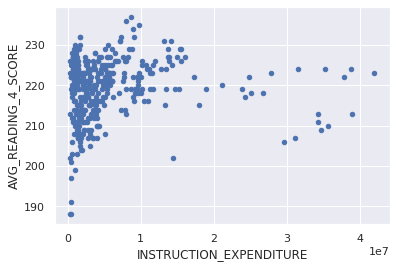

In [84]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE',y='AVG_READING_4_SCORE')

**<RELATIONSHIP BETWEEN INSTRUCTION EXPENDITURE OF A STATE AND 4TH-GRADE STUDENTS' GENERAL PERFORMANCE ON READING\>**

**Visualization 2**

Text(0.5, 1.0, 'AVG 4TH-GRADE MATH SCORE')

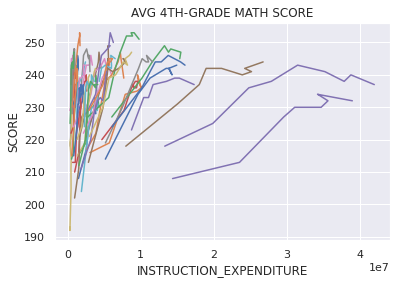

In [143]:
df.set_index('INSTRUCTION_EXPENDITURE').groupby('STATE').AVG_MATH_4_SCORE.plot()
plt.ylabel('SCORE')
plt.title('AVG 4TH-GRADE MATH SCORE')

**<THE VISUALIZATION PRESENTS A RELATIONSHIP BETWEEN INSTURCTION EXPENDITURE AND 4TH-GRADE STUDENTS' AVG MATH PERFORMANCE. THE PLOT SHOWS A GENERAL TENDENCY OF THIS RELATIONSHIP.\>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X = df[['TOTAL_REVENUE','ENROLL_4','INSTRUCTION_EXPENDITURE_PER_STUDENT','YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [147]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [148]:
# create your model here
model = LinearRegression()

In [149]:
model.fit(X_train, y_train)

LinearRegression()

In [150]:
print(model.intercept_)
print(model.coef_)

-1240.3917259322486
[ 4.66464680e-08 -1.33917807e-05  5.64863206e-01  7.34637172e-01]


In [153]:
# FOR CLASSIFICATION ONLY:
model.score(X_test, y_test)
np.mean(model.predict(X_test)-y_test)
np.mean(np.abs(model.predict(X_test)-y_test))
np.mean((model.predict(X_test)-y_test)**2)**0.5

8.053625002704514

/mnt/d/MDST/mdst_tutorials_W22/env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, '4TH-GRADE AVG MATH SCORE')

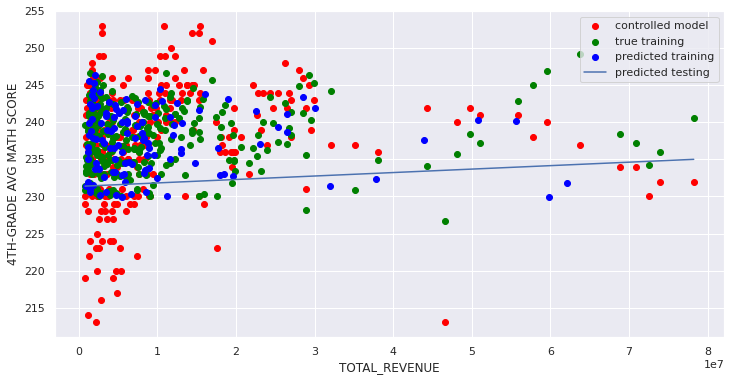

In [152]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)
# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

col_name = 'TOTAL_REVENUE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("4TH-GRADE AVG MATH SCORE")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

In [159]:
# The work presents the mean of the average score of the 4th grade math in each state in 13 years. And it also shows the max score 

In [ ]:
# students have got throughout these years in each state.It is also revealed that there's a relationship between the instruction 

In [160]:
# expenditure and 4th-grade-students' performance on math in general.